<img src="mmu_logo.png" style="height: 80px;" align=left> 

#### TDS3301 - Data Mining

Group Member:

Ong Shuoh Chwen (1171102212)

Yong Wen Kai (1171101664)

# QUESTION 3: Intelligent Decision-Making for Loan Application

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori
import altair as alt
import missingno as msno
from string import ascii_letters
import seaborn as sns
import imblearn
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from boruta import BorutaPy
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, neighbors
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
from kmodes.kmodes import KModes
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans 

# Data Pre-Processing

First and foremost, we will need to import the `Bank_CS.csv` into the project.

In [2]:
df = pd.read_csv("Bank_CS.csv")
df.head()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,employer,NaN,16.0,yes,platinum,2.0,5.0,2.0,2.0,...,1,condominium,10.0,Johor,2.0,12262.0,853141.0,16025.0,Reject,7
1,1,employer,605505.0,19.0,no,normal,2.0,NaN,2.0,2.0,...,2,NaN,10.0,Johor,2.0,9251.0,882901.0,17082.0,Accept,9
2,1,employer,NaN,NaN,yes,normal,2.0,5.0,2.0,2.0,...,3,condominium,10.0,Johor,NaN,4919.0,540489.0,12613.0,Reject,8
3,1,employer,490216.0,NaN,no,normal,2.0,5.0,NaN,2.0,...,1,condominium,10.0,Johor,NaN,4459.0,536727.0,10952.0,Accept,9
4,1,employer,292728.0,14.0,yes,normal,2.0,5.0,2.0,2.0,...,2,condominium,10.0,Johor,3.0,5628.0,774695.0,NaN,Reject,8


##### Step 1: Dealing with missing values.

In [3]:
# Duplicate the dataframe first
df1 = df.copy()
df1.head()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,employer,NaN,16.0,yes,platinum,2.0,5.0,2.0,2.0,...,1,condominium,10.0,Johor,2.0,12262.0,853141.0,16025.0,Reject,7
1,1,employer,605505.0,19.0,no,normal,2.0,NaN,2.0,2.0,...,2,NaN,10.0,Johor,2.0,9251.0,882901.0,17082.0,Accept,9
2,1,employer,NaN,NaN,yes,normal,2.0,5.0,2.0,2.0,...,3,condominium,10.0,Johor,NaN,4919.0,540489.0,12613.0,Reject,8
3,1,employer,490216.0,NaN,no,normal,2.0,5.0,NaN,2.0,...,1,condominium,10.0,Johor,NaN,4459.0,536727.0,10952.0,Accept,9
4,1,employer,292728.0,14.0,yes,normal,2.0,5.0,2.0,2.0,...,2,condominium,10.0,Johor,3.0,5628.0,774695.0,NaN,Reject,8


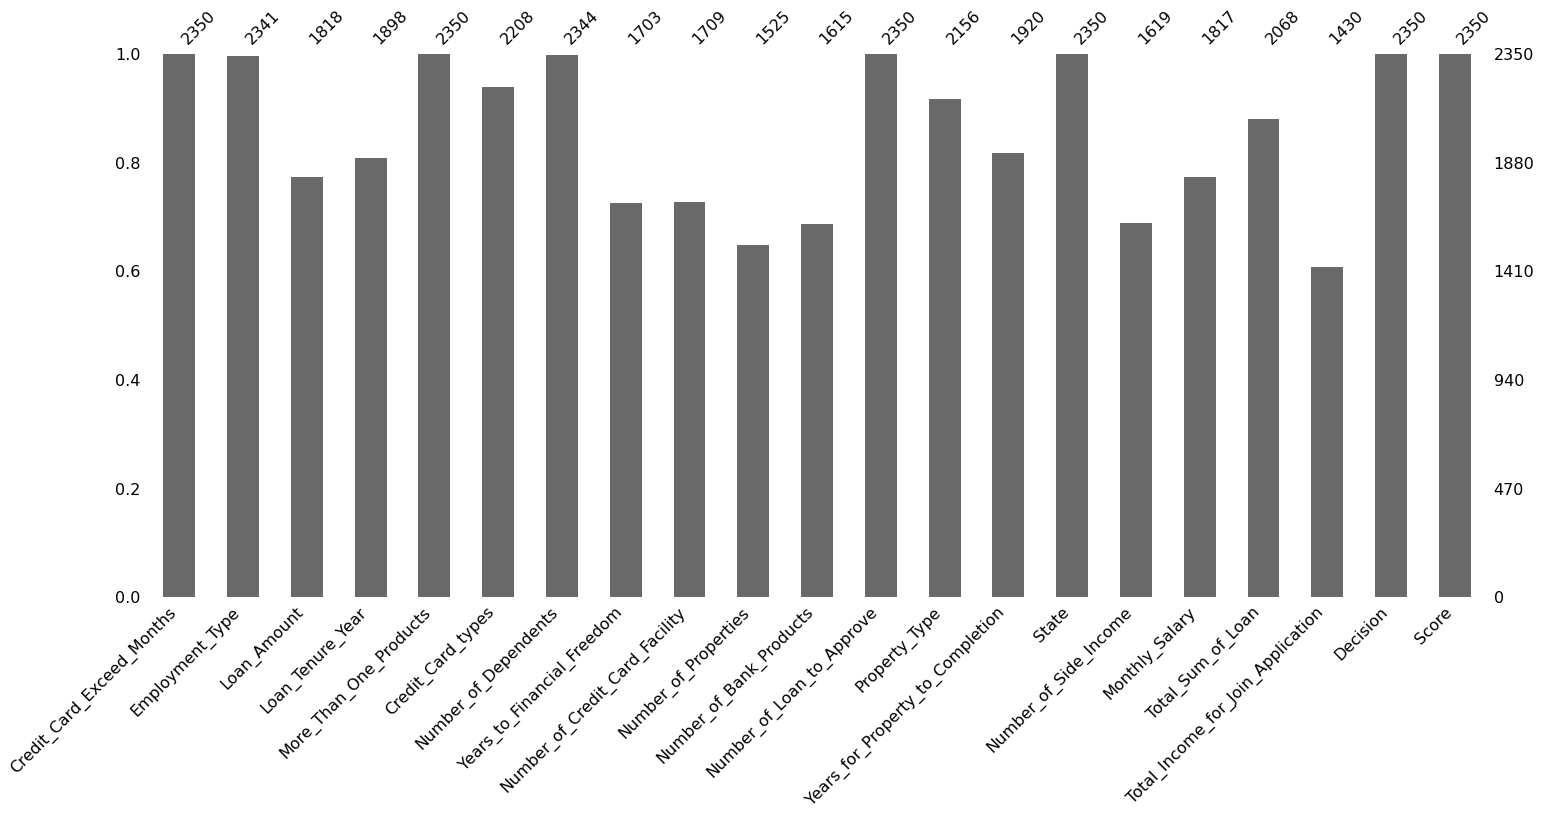

In [4]:
# Check missing values
df1.isnull().sum()
msno.bar(df1)
plt.savefig('missing_val')

The bar chart above shows that not all values are the same, so in order to proceed, we will need to fill those missing values with mode
`(the highest value among all other values)`.

In [5]:
# Fill all missing values with mode
for column in df1.columns:
    df1[column].fillna(df1[column].mode()[0], inplace=True)

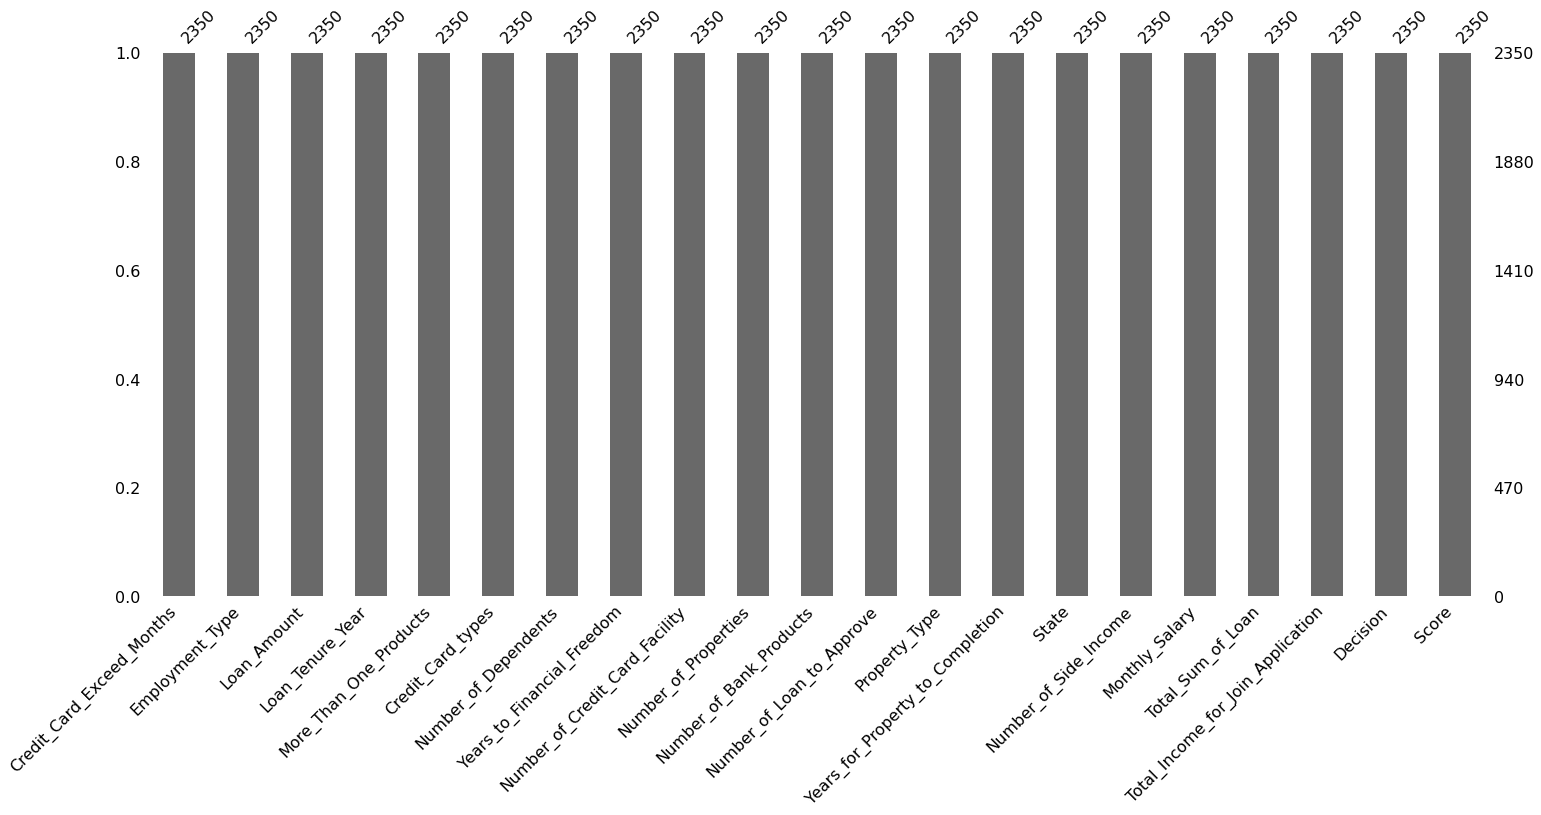

In [6]:
# Check missing values again
df1.isnull().sum()
msno.bar(df1)
plt.savefig('filled_missing_val')

In [7]:
df1.dtypes

Credit_Card_Exceed_Months              int64
Employment_Type                       object
Loan_Amount                          float64
Loan_Tenure_Year                     float64
More_Than_One_Products                object
Credit_Card_types                     object
Number_of_Dependents                 float64
Years_to_Financial_Freedom           float64
Number_of_Credit_Card_Facility       float64
Number_of_Properties                 float64
Number_of_Bank_Products              float64
Number_of_Loan_to_Approve              int64
Property_Type                         object
Years_for_Property_to_Completion     float64
State                                 object
Number_of_Side_Income                float64
Monthly_Salary                       float64
Total_Sum_of_Loan                    float64
Total_Income_for_Join_Application    float64
Decision                              object
Score                                  int64
dtype: object

##### Step 2: Dealing With Noisy Data.

In [8]:
# Employment_Type
df1.Employment_Type = df1.Employment_Type.replace("employer", "Employer", regex=True)
df1.Employment_Type = df1.Employment_Type.replace("Self_Employed", "Self Employed", regex=True)
df1.Employment_Type = df1.Employment_Type.replace("government", "Government", regex=True)
df1.Employment_Type = df1.Employment_Type.replace("employee", "Employee", regex=True)
df1.Employment_Type = df1.Employment_Type.replace("Fresh_Graduate", "Fresh Graduate", regex=True)

# Credit_Card_types
df1.Credit_Card_types = df1.Credit_Card_types.replace("platinum", "Platinum", regex=True)
df1.Credit_Card_types = df1.Credit_Card_types.replace("normal", "Normal", regex=True)
df1.Credit_Card_types = df1.Credit_Card_types.replace("gold", "Gold", regex=True)

# Property_Type
df1.Property_Type = df1.Property_Type.replace("bungalow", "Bungalow", regex=True)
df1.Property_Type = df1.Property_Type.replace("condominium", "Condominium", regex=True)
df1.Property_Type = df1.Property_Type.replace("flat", "Flat", regex=True)
df1.Property_Type = df1.Property_Type.replace("terrace", "Terrace", regex=True)

# State
df1.State = df1.State.replace("P.Pinang", "Penang", regex=True)
df1.State = df1.State.replace("Pulau Penang", "Penang", regex=True)
df1.State = df1.State.replace("Johor B", "Johor", regex=True)
df1.State = df1.State.replace("K.L", "Kuala Lumpur", regex=True)
df1.State = df1.State.replace("N.Sembilan", "Negeri Sembilan", regex=True)
df1.State = df1.State.replace("N.S", "Negeri Sembilan", regex=True)
df1.State = df1.State.replace("SWK", "Sarawak", regex=True)
df1.State = df1.State.replace("Trengganu", "Terrenganu", regex=True)

In [9]:
#Duplicate the dataframe again for replacing dtype
df2 = df1.copy()

In [10]:
# Change Loan_Amount to Categorical DType
df2['Loan_Amount'] = np.where(df1['Loan_Amount'].between(100000.0,300000.0), '100000-300000', df2['Loan_Amount'])
df2['Loan_Amount'] = np.where(df1['Loan_Amount'].between(300000.0,500000.0), '300000-500000', df2['Loan_Amount'])
df2['Loan_Amount'] = np.where(df1['Loan_Amount'].between(500000.0,700000.0), '500000-700000', df2['Loan_Amount'])
df2['Loan_Amount'] = np.where(df1['Loan_Amount'].between(700000.0,900000.0), '700000-900000', df2['Loan_Amount'])
df2['Loan_Amount'] = df2['Loan_Amount'].astype("category")

# Change Loan_Amount to Categorical DType
df2['Monthly_Salary'] = np.where(df1['Monthly_Salary'] < 4000.0, '<4000', df2['Monthly_Salary'])
df2['Monthly_Salary'] = np.where(df1['Monthly_Salary'].between(4000.0,7000.0), '4000-7000', df2['Monthly_Salary'])
df2['Monthly_Salary'] = np.where(df1['Monthly_Salary'].between(7000.0,10000.0), '7000-10000', df2['Monthly_Salary'])
df2['Monthly_Salary'] = np.where(df1['Monthly_Salary'].between(10000.0,13000.0), '10000-13000', df2['Monthly_Salary'])
df2['Monthly_Salary'] = df2['Monthly_Salary'].astype("category")

# Exploratory Data Analysis

#### Exploratory Data Analysis Before SMOTE

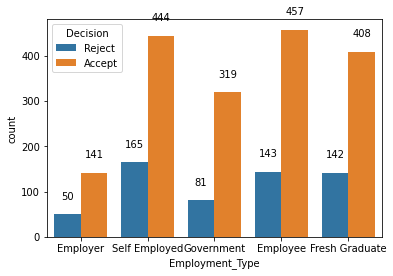

In [11]:
# which type of employment is likely to have the loan accepted?
b = sns.countplot(x='Employment_Type', hue='Decision', data = df2)

for p in b.patches:
    b.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
plt.savefig('bSMOTE_employment')

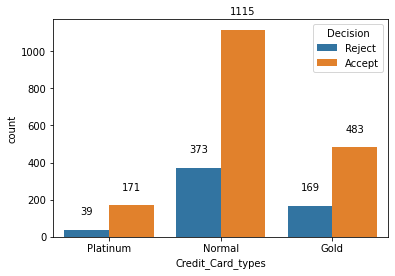

In [12]:
# which type of credit card user is likely to have the loan accepted?
b = sns.countplot(x='Credit_Card_types', hue='Decision',  data = df2)

for p in b.patches:
    b.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
plt.savefig('bSMOTE_ccard_type')

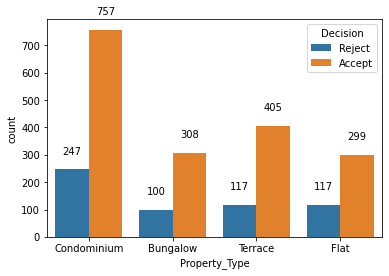

In [13]:
# which type of properties is likely to have the loan accepted?
b = sns.countplot(x='Property_Type', hue='Decision', data = df2)

for p in b.patches:
    b.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
plt.savefig('bSMOTE_property')

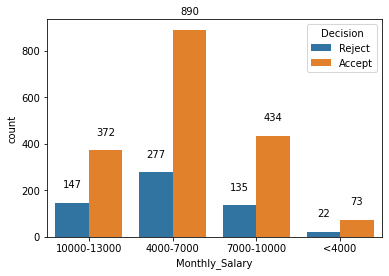

In [14]:
# what is the monthly salary that is likely to have the loan accepted?
b = sns.countplot(x='Monthly_Salary', hue='Decision', data = df2)

for p in b.patches:
    b.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
plt.savefig('bSMOTE_month_salary')

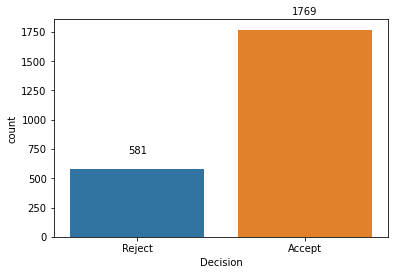

In [15]:
# what is the decision made by the bank the most frequent?
b = sns.countplot(x='Decision', data = df2)

for p in b.patches:
    b.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
plt.savefig('bSMOTE_dcs_bank')

#### Applying SMOTE based on Decision

In [16]:
df3 = df2.copy()

df3['Employment_Type']= df3['Employment_Type'].map({'Employee':0, 'Employer':1, 'Fresh Graduate':2, 'Self Employment':3, 'Government':4})
df3['Credit_Card_types']= df3['Credit_Card_types'].map({'Normal':0, 'Gold':1, 'Platinum':2})
df3['Property_Type']= df3['Property_Type'].map({'Bungalow':0, 'Condominium':1, 'Flat':2, 'Terrace':3})
df3['Monthly_Salary']= df3['Monthly_Salary'].map({'<4000':0, '4000-7000':1, '7000-10000':2, '10000-13000':3})

dictionary = defaultdict(LabelEncoder)
df3 = df2.apply(lambda x: dictionary[x.name].fit_transform(x))

y = df3.Decision
X = df3.drop(columns =['Decision'])

In [17]:
smt = imblearn.over_sampling.SMOTE(sampling_strategy="minority", random_state=10, k_neighbors=5)
X_res, y_res = smt.fit_resample(X, y)
colnames = X_res.columns

#### Exploratory Data Analysis after SMOTE (Based on Decision)

In [18]:
dfSmote = pd.concat([X_res.reset_index(drop=True), y_res], axis=1) 
dfSmote = dfSmote.apply(lambda x: dictionary[x.name].inverse_transform(x))
dfSmote.head()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_types,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Score,Decision
0,1,Employer,500000-700000,16.0,yes,Platinum,2.0,5.0,2.0,2.0,...,1,Condominium,10.0,Johor,2.0,10000-13000,853141.0,16025.0,7,Reject
1,1,Employer,500000-700000,19.0,no,Normal,2.0,15.0,2.0,2.0,...,2,Condominium,10.0,Johor,2.0,7000-10000,882901.0,17082.0,9,Accept
2,1,Employer,500000-700000,22.0,yes,Normal,2.0,5.0,2.0,2.0,...,3,Condominium,10.0,Johor,3.0,4000-7000,540489.0,12613.0,8,Reject
3,1,Employer,300000-500000,22.0,no,Normal,2.0,5.0,4.0,2.0,...,1,Condominium,10.0,Johor,3.0,4000-7000,536727.0,10952.0,9,Accept
4,1,Employer,100000-300000,14.0,yes,Normal,2.0,5.0,2.0,2.0,...,2,Condominium,10.0,Johor,3.0,4000-7000,774695.0,9532.0,8,Reject


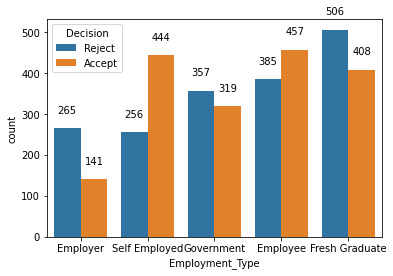

In [19]:
# which type of employment is likely to have the loan accepted?
b = sns.countplot(x='Employment_Type', hue='Decision', data = dfSmote)

for p in b.patches:
    b.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
plt.savefig('aSMOTE_employment')

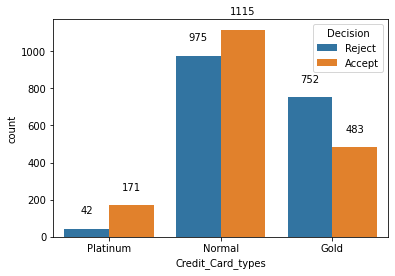

In [20]:
# which type of credit card user is likely to have the loan accepted?
b = sns.countplot(x='Credit_Card_types', hue='Decision', data = dfSmote)

for p in b.patches:
    b.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
plt.savefig('aSMOTE_ccard_type')

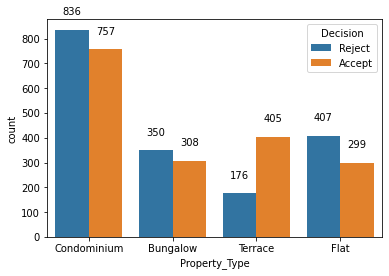

In [21]:
# which type of properties is likely to have the loan accepted?
b = sns.countplot(x='Property_Type', hue='Decision', data = dfSmote)

for p in b.patches:
    b.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
plt.savefig('aSMOTE_property')

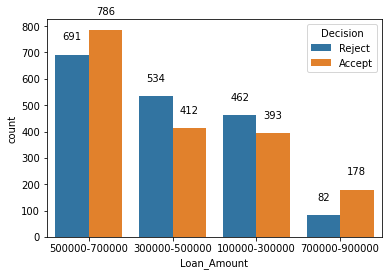

In [22]:
# what is the amount of loan that is likely to have the loan accepted?
b = sns.countplot(x='Loan_Amount', hue='Decision', data = dfSmote)

for p in b.patches:
    b.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
plt.savefig('aSMOTE_loan_amount')

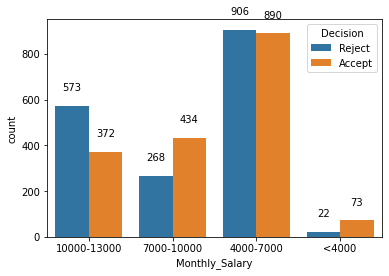

In [23]:
# what is the monthly salary that is likely to have the loan accepted?
b = sns.countplot(x='Monthly_Salary', hue='Decision',  data = dfSmote)

for p in b.patches:
    b.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
plt.savefig('aSMOTE_month_salary')

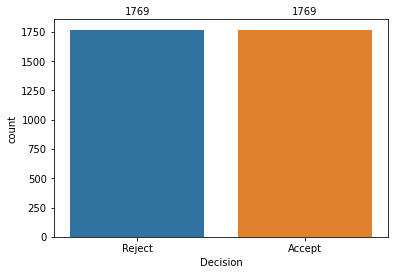

In [24]:
# what is the decision made by the bank the most frequent?
b = sns.countplot(x='Decision', data = dfSmote)

for p in b.patches:
    b.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
plt.savefig('aSMOTE_dcs_bank')

# Feature Selection

In [25]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

#### Boruta

In [26]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, random_state=1)
feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)
feat_selector.fit(X_res.values, y_res.values.ravel())

boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [27]:
print('---------Top 10----------')
display(boruta_score.head(10))

print('---------Bottom 10----------')
boruta_score.tail(10)

---------Top 10----------


,Features,Score
0,Credit_Card_Exceed_Months,1.0
1,Employment_Type,1.0
18,Total_Income_for_Join_Application,1.0
17,Total_Sum_of_Loan,1.0
16,Monthly_Salary,1.0
15,Number_of_Side_Income,1.0
14,State,1.0
13,Years_for_Property_to_Completion,1.0
12,Property_Type,1.0
11,Number_of_Loan_to_Approve,1.0


---------Bottom 10----------


,Features,Score
10,Number_of_Bank_Products,1.0
8,Number_of_Credit_Card_Facility,1.0
7,Years_to_Financial_Freedom,1.0
6,Number_of_Dependents,1.0
5,Credit_Card_types,1.0
4,More_Than_One_Products,1.0
3,Loan_Tenure_Year,1.0
19,Score,1.0
2,Loan_Amount,0.5
9,Number_of_Properties,0.0


#### RFE

In [28]:
rf2 = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth = 5, n_estimators = 100, random_state=1)
rf2.fit(X_res,y_res)
rfe = RFECV(rf2, min_features_to_select = 1, cv = 3)
rfe.fit(X_res,y_res)

RFECV(cv=3,
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                       n_jobs=-1, random_state=1))

In [29]:
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)

In [30]:
print('---------Top 10----------')
display(rfe_score.head(10))

print('---------Bottom 10----------')
rfe_score.tail(10)

---------Top 10----------


,Features,Score
3,Loan_Tenure_Year,1.00
14,State,0.95
15,Number_of_Side_Income,0.89
19,Score,0.84
4,More_Than_One_Products,0.79
12,Property_Type,0.74
11,Number_of_Loan_to_Approve,0.68
5,Credit_Card_types,0.63
0,Credit_Card_Exceed_Months,0.58
16,Monthly_Salary,0.53


---------Bottom 10----------


,Features,Score
17,Total_Sum_of_Loan,0.47
7,Years_to_Financial_Freedom,0.42
1,Employment_Type,0.37
8,Number_of_Credit_Card_Facility,0.32
10,Number_of_Bank_Products,0.26
18,Total_Income_for_Join_Application,0.21
13,Years_for_Property_to_Completion,0.16
6,Number_of_Dependents,0.11
2,Loan_Amount,0.05
9,Number_of_Properties,0.00


#### Remove the feature with low ranking

In [31]:
X_res.drop(columns=["Number_of_Properties","Loan_Amount"], axis=1, inplace=True)

# Association Rule Mining

In [32]:
df4 = df3.copy()
df4.drop(axis= 1, inplace = True, columns = ['Employment_Type', 'Property_Type', 'Credit_Card_types','Score','Monthly_Salary','State','Decision'])

df4_dummy = pd.get_dummies(df4)

In [33]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [34]:
df4_dummy = df4_dummy.applymap(encode_units)
frequent_itemsets = apriori(df4_dummy, min_support=0.5, use_colnames=True)

In [35]:
df4_dummy

,Credit_Card_Exceed_Months,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Years_for_Property_to_Completion,Number_of_Side_Income,Total_Sum_of_Loan,Total_Income_for_Join_Application
0,0,1,1,1,0,0,0,0,0,0,0,1,1,1
1,0,1,1,0,0,1,0,0,0,1,0,1,1,1
2,0,1,1,1,0,0,0,0,0,1,0,1,1,1
3,0,1,1,0,0,0,1,0,0,0,0,1,1,1
4,0,0,1,1,0,0,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,1,1,1,0,1,1,0,0,1,1,1,0,1,1
2346,1,1,1,1,1,1,0,0,1,1,1,1,1,1
2347,1,1,1,0,1,1,1,0,1,1,1,0,1,1
2348,1,1,1,1,1,1,0,0,1,1,0,1,1,1


In [36]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))
rules[(rules['confidence'] > 0.5) & (rules['antecedent_len'] <= 2) & (rules['consequent_len'] <= 2)].nlargest(10, 'lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequent_len
304,"(Loan_Amount, Credit_Card_Exceed_Months)","(Number_of_Credit_Card_Facility, Years_to_Fina...",0.676596,0.794468,0.597021,0.882390,1.110668,0.059488,1.747571,2,2
301,"(Number_of_Credit_Card_Facility, Years_to_Fina...","(Loan_Amount, Credit_Card_Exceed_Months)",0.794468,0.676596,0.597021,0.751473,1.110668,0.059488,1.301284,2,2
513,"(Number_of_Side_Income, Credit_Card_Exceed_Mon...","(Number_of_Credit_Card_Facility, Years_to_Fina...",0.674468,0.794468,0.593191,0.879495,1.107024,0.057348,1.705592,2,2
514,"(Number_of_Credit_Card_Facility, Years_to_Fina...","(Number_of_Side_Income, Credit_Card_Exceed_Mon...",0.794468,0.674468,0.593191,0.746652,1.107024,0.057348,1.284922,2,2
82,"(Number_of_Credit_Card_Facility, Years_to_Fina...",(Credit_Card_Exceed_Months),0.794468,0.872340,0.766809,0.965185,1.106431,0.073762,3.666776,2,1
87,(Credit_Card_Exceed_Months),"(Number_of_Credit_Card_Facility, Years_to_Fina...",0.872340,0.794468,0.766809,0.879024,1.106431,0.073762,1.698953,1,2
523,"(Number_of_Credit_Card_Facility, Years_to_Fina...","(Total_Sum_of_Loan, Credit_Card_Exceed_Months)",0.794468,0.871915,0.766383,0.964649,1.106357,0.073674,3.623256,2,2
535,"(Number_of_Credit_Card_Facility, Years_to_Fina...","(Total_Income_for_Join_Application, Credit_Car...",0.794468,0.871915,0.766383,0.964649,1.106357,0.073674,3.623256,2,2
528,"(Total_Sum_of_Loan, Credit_Card_Exceed_Months)","(Number_of_Credit_Card_Facility, Years_to_Fina...",0.871915,0.794468,0.766383,0.878965,1.106357,0.073674,1.698125,2,2
540,"(Total_Income_for_Join_Application, Credit_Car...","(Number_of_Credit_Card_Facility, Years_to_Fina...",0.871915,0.794468,0.766383,0.878965,1.106357,0.073674,1.698125,2,2


# Machine Learning Techniques

##### Support Vector Machine (SVM)

In [ ]:
# Set the test data to 30%
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3,random_state=1)

In [ ]:
#kernels = ['rbf','poly', 'linear']

#for kernel in kernels:
    #print ('Kernel: ' + str(kernel))
clf = svm.SVC(kernel='linear', gamma='auto', random_state = 1, probability=True)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

f1_svm = metrics.f1_score(y_test, y_pred)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
print("\n")

In [ ]:
# Calculate AUC

prob_SVM = clf.predict_proba(X_test)
prob_SVM = prob_SVM[:, 1]

auc_SVM = roc_auc_score(y_test, prob_SVM)
print ('AUC: %.2f' % auc_SVM)

In [ ]:
# Plot ROC Curve 

fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, prob_SVM) 

plt.plot(fpr_SVM, tpr_SVM, color='blue', label='SVM') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig('roc_svm')

In [ ]:
# Plot Precision-Recall Curve

prec_SVM, rec_SVM, threshold_SVM = precision_recall_curve(y_test, prob_SVM)

plt.plot(prec_SVM, rec_SVM, color='blue', label='SVM') 
plt.plot([1, 0], [0.1, 0.1], color='green', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.savefig('prs_svm')

##### K-Nearest Neighbour

In [ ]:
k_range = range(1,10)
scores = []

for k in k_range:
    print("Number of K: " + str(k))
    knn = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    y_pred = knn.predict(X_test)
    
    if (k == 3):
        f1_knn = metrics.f1_score(y_test, y_pred)
        
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    print("F1:",metrics.f1_score(y_test, y_pred))
    print("\n")
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy by n_neigbors')
plt.scatter(k_range, scores)
plt.plot(k_range, scores, color='green', linestyle='dashed', linewidth=1, markersize=5)
plt.savefig('knn_plot')

In [ ]:
# Calculate AUC

prob_KNN = knn.predict_proba(X_test)
prob_KNN = prob_KNN[:, 1]

auc_KNN = roc_auc_score(y_test, prob_KNN)
print ('AUC: %.2f' % auc_KNN)

In [ ]:
# Plot ROC Curve 

fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, prob_KNN) 

plt.plot(fpr_KNN, tpr_KNN, color='blue', label='KNN') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig('roc_knn')

In [ ]:
# Plot Precision-Recall Curve

prec_KNN, rec_KNN, threshold_KNN = precision_recall_curve(y_test, prob_KNN)

plt.plot(prec_KNN, rec_KNN, color='blue', label='KNN') 
plt.plot([1, 0], [0.1, 0.1], color='green', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.savefig('prs_knn')

##### Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [ ]:
f1_nb = metrics.f1_score(y_test, y_pred)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

In [ ]:
# Calculate AUC

prob_NB = nb.predict_proba(X_test)
prob_NB = prob_NB[:, 1]

auc_NB = roc_auc_score(y_test, prob_NB)
print ('AUC: %.2f' % auc_NB)

In [ ]:
# Plot ROC Curve 

fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, prob_NB) 

plt.plot(fpr_NB, tpr_NB, color='blue', label='NB') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig('roc_nb')

In [ ]:
# Plot Precision-Recall Curve

prec_NB, rec_NB, threshold_NB = precision_recall_curve(y_test, prob_NB)

plt.plot(prec_NB, rec_NB, color='blue', label='NB') 
plt.plot([1, 0], [0.1, 0.1], color='green', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.savefig('prs_nb')

##### Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(random_state=1)
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [ ]:
f1_dt = metrics.f1_score(y_test, y_pred)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

In [ ]:
# Calculate AUC

prob_DT = nb.predict_proba(X_test)
prob_DT = prob_DT[:, 1]

auc_DT = roc_auc_score(y_test, prob_DT)
print ('AUC: %.2f' % auc_DT)

In [ ]:
# Plot ROC Curve 

fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, prob_DT) 

plt.plot(fpr_DT, tpr_DT, color='blue', label='DT') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.savefig('roc_dt')

In [ ]:
# Plot Precision-Recall Curve

prec_DT, rec_DT, threshold_DT = precision_recall_curve(y_test, prob_DT)

plt.plot(prec_DT, rec_DT, color='blue', label='DT') 
plt.plot([1, 0], [0.1, 0.1], color='green', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.savefig('prs_dt')

##### Classification Model Evaluation

In [ ]:
scores = {'SVM': f1_svm, 'KNN': f1_knn, 'Naive Bayes': f1_nb, 'Decision Tree': f1_dt}
model = list(scores.keys())
score = list(scores.values())

plt.figure(figsize=(7,6))
plt.bar(model, score, width=0.5)
for x,y in zip(model,score):

    label = "{:.2f}".format(y)

    plt.annotate(label,
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5),
                 ha='center')

plt.title("F1-score of classification models")
plt.savefig('classificationModel')

In [ ]:
# Plot ROC Curve 

fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, prob_DT) 
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, prob_SVM) 
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, prob_KNN) 
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, prob_NB) 

plt.plot(fpr_DT, tpr_DT, color='blue', label='DT: %.2f' % auc_DT) 
plt.plot(fpr_SVM, tpr_SVM, color='green', label='SVM: %.2f' % auc_SVM) 
plt.plot(fpr_KNN, tpr_KNN, color='red', label='KNN: %.2f' % auc_KNN) 
plt.plot(fpr_NB, tpr_NB, color='yellow', label='NB: %.2f' % auc_NB) 

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('roc_all')

In [ ]:
# Plot Precision-Recall Curve

prec_DT, rec_DT, threshold_DT = precision_recall_curve(y_test, prob_DT)
prec_SVM, rec_SVM, thresholds_SVM = precision_recall_curve(y_test, prob_SVM) 
prec_KNN, rec_KNN, thresholds_KNN = precision_recall_curve(y_test, prob_KNN) 
prec_NB, rec_NB, thresholds_NB = precision_recall_curve(y_test, prob_NB) 

plt.plot(prec_DT, rec_DT, color='blue', label='DT: %.2f' % prs_DT) 
plt.plot(prec_SVM, rec_SVM, color='green', label='SVM: %.2f' % prs_SVM) 
plt.plot(prec_KNN, rec_KNN, color='red', label='KNN: %.2f' % prs_KNN) 
plt.plot(prec_NB, rec_NB, color='yellow', label='NB: %.2f' % prs_NB) 

plt.plot([1, 0], [0.1, 0.1], color='black', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc = 'upper left')
plt.savefig('prs_all')

# Clustering

#### KMode Clustering

In [ ]:
df5 = pd.concat([X_res.reset_index(drop=True), y_res], axis=1)

In [ ]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df5)
    cost.append(kmode.cost_)

In [ ]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)
plt.xlabel('K')
plt.ylabel('Cost')
plt.savefig('kModeElbow')

In [ ]:
# Chosen cluster = 2, because it is the elbow
km = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
clusters = km.fit_predict(df4)

In [ ]:
df5 = df5.apply(lambda x: dictionary[x.name].inverse_transform(x))

In [ ]:
clusters_df = pd.DataFrame(clusters)
clusters_df.columns = ['Cluster']
df5_new = pd.concat([df5, clusters_df], axis = 1).reset_index()
df5_new = df5_new.drop(df5_new.columns[0],axis=1)

In [ ]:
b = sns.countplot(x='Cluster', data = df5_new)

for p in b.patches:
    b.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')

plt.savefig('kmodeCluster')

In [ ]:
plt.subplots(figsize = (15,5))
b = sns.countplot(x=df5_new['Employment_Type'],order=df5_new['Employment_Type'].value_counts().index,hue=df5_new['Cluster'])

for p in b.patches:
    b.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
    
plt.savefig('kmode_employ')

In [ ]:
plt.subplots(figsize = (15,5))
b = sns.countplot(x=df5_new['Credit_Card_types'],order=df5_new['Credit_Card_types'].value_counts().index,hue=df5_new['Cluster'])

for p in b.patches:
    b.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
    
plt.savefig('kmode_ccard')

In [ ]:
plt.subplots(figsize = (15,5))
b = sns.countplot(x=df5_new['Monthly_Salary'],order=df5_new['Monthly_Salary'].value_counts().index,hue=df5_new['Cluster'])

for p in b.patches:
    b.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
    
plt.savefig('kmode_salary')

In [ ]:
plt.subplots(figsize = (15,5))
b = sns.countplot(x=df5_new['Property_Type'],order=df5_new['Property_Type'].value_counts().index,hue=df5_new['Cluster'])

for p in b.patches:
    b.annotate("%.0f" % p.get_height(), (p.get_x() + 
    p.get_width() / 2., p.get_height()), 
    ha='center', va='center', rotation=0, 
    xytext=(0, 18), textcoords='offset points')
    
plt.savefig('kmode_property')